In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%load_ext autoreload
%autoreload 2

In [2]:
from Cfg import Cfg
C = Cfg('NIST', 16000, 'pashto', 'dev') 

In [3]:
from RecordingCorpus import RecordingCorpus
from multiprocessing import Pool
import warnings
warnings.filterwarnings("ignore")

if __name__ == '__main__':   
    with Pool(16) as pool:
        recordings = RecordingCorpus(C, pool)

100%|██████████| 136/136 [00:06<00:00, 20.47it/s]


In [65]:
artifact=recordings.artifacts[1]

In [67]:
artifact.key

('pashto', 'BABEL_BP_104_23560_20120124_200340_inLine')

In [68]:
audio=artifact.source.value

In [69]:
%matplotlib inline
import matplotlib.pylab as plt

In [70]:
import numpy as np
import librosa
from collect_false import collect_false
from clip_ends import clip_ends

In [71]:
from Clip import Clip

In [72]:
max_duration=13

In [84]:
audio=artifact.source.value
size=artifact.source.n_samples
tasks=[Clip(C.sample_rate, audio, audio, 0, size, size)]
solution=[]
while len(tasks):
    task, tasks = tasks[0], tasks[1:]
    good, bad = task.split_pass(max_duration)
    solution.extend(good)
    tasks.extend(bad)

In [85]:
solution=list(sorted(solution, key=lambda x: x.parent_start))

results=list(sorted([(x.parent_start, x.parent_end, 'red') for x in solution]))

R=np.hstack([x.audio for x in solution])

soln=[x for x in solution if x.clipped_size > 0]
len(soln), len(solution)

Z=np.hstack([x.clipped for x in soln])

z=np.cumsum(np.array([x.clipped.shape[0] for x in soln]))

In [90]:
[x.clipped.shape[0]/16000 for x in soln]

[0.8934375,
 12.795625,
 12.93925,
 8.20525,
 6.175,
 0.4038125,
 6.0253125,
 7.8828125,
 7.656625,
 12.53625,
 2.6655,
 0.462125,
 4.8889375,
 0.0720625,
 4.743625,
 7.5348125,
 9.74475,
 4.562875,
 2.5654375,
 5.7574375,
 8.0854375,
 0.0540625,
 2.106875,
 7.2645,
 8.1584375,
 10.6025625,
 6.743375,
 7.86825,
 3.8620625,
 0.3255625,
 2.0908125,
 9.8068125,
 4.1880625,
 3.855875,
 0.0473125,
 0.4268125,
 8.1395,
 5.2865,
 11.371,
 5.1468125,
 0.0416875,
 0.1500625,
 0.03125,
 0.0128125,
 9.39875,
 8.9028125,
 0.1350625,
 5.9570625,
 5.679,
 0.48125,
 0.3039375,
 2.8786875,
 4.318,
 4.3358125,
 1.2953125,
 5.085375,
 0.7990625,
 2.1895625,
 1.1674375,
 0.207875,
 0.894625,
 12.4931875,
 1.2780625,
 0.064,
 1.4235,
 2.750875,
 0.0480625,
 0.974875,
 0.0480625,
 0.0480625,
 2.431,
 0.0640625,
 0.0480625,
 0.0480625,
 0.0480625,
 0.0960625,
 0.1760625,
 0.3999375,
 0.4640625,
 0.1681875,
 0.384,
 0.1566875,
 1.502625,
 0.943125,
 0.79825,
 3.1780625,
 12.9359375,
 0.048,
 0.0640625,
 0.04

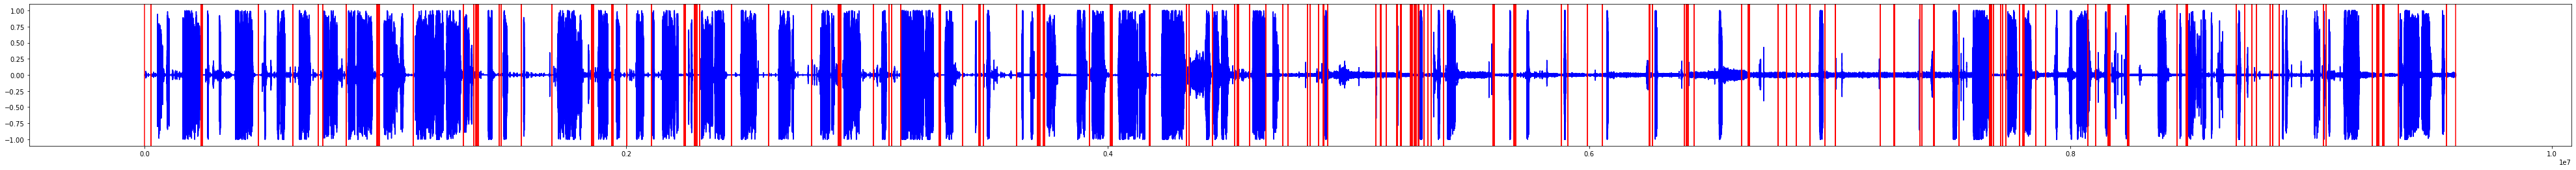

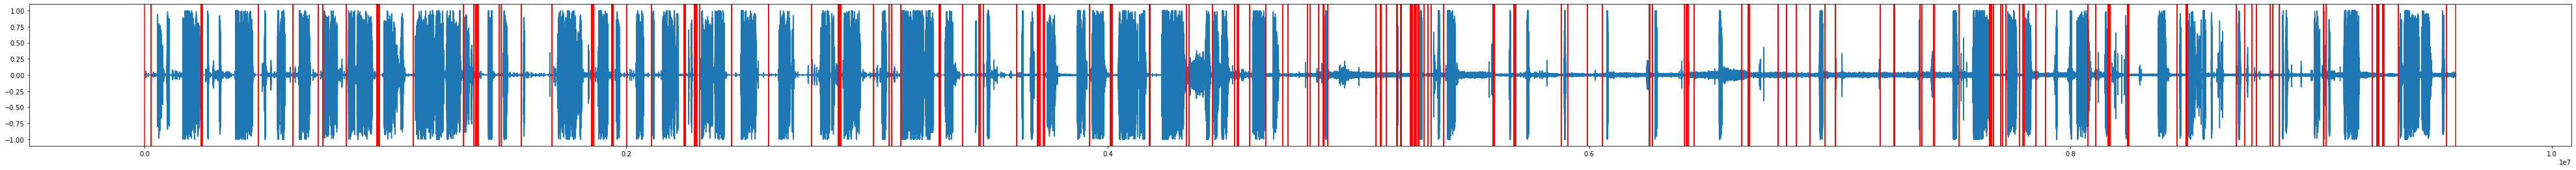

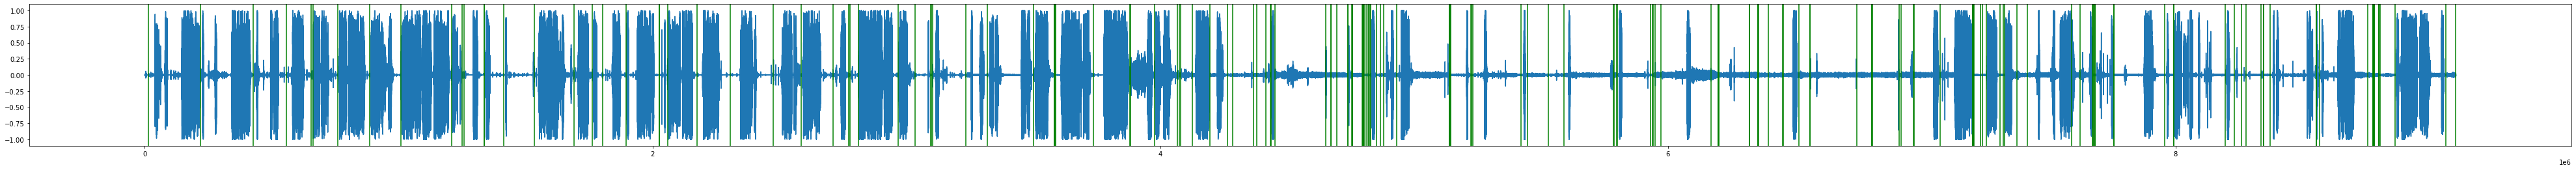

In [86]:
plt.figure(figsize=(70,4))
plt.plot(audio, color='blue');
for (x1,x2,color) in results:
    plt.axvline(x=x1,color=color)
    plt.axvline(x=x2,color=color)
plt.show()
plt.figure(figsize=(70,4))
plt.plot(R)
for (x1,x2,color) in results:
    plt.axvline(x=x1,color=color)
    plt.axvline(x=x2,color=color)
plt.show()
plt.figure(figsize=(70,4))len(soln)
plt.plot(Z)
for x1 in z:
    plt.axvline(x=x1,color='green')
plt.show()

In [57]:
vars(soln[12])

{'sample_rate': 16000,
 'audio': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'clipped': array([ 0.00027466,  0.00039673,  0.00018311, ..., -0.00170898,
        -0.00170898, -0.00247192], dtype=float32),
 'clipped_size': 127466,
 'seconds': 7.966625,
 'parent_start': 1554025,
 'parent_end': 1768412}

In [61]:
foo=soln[12].clipped

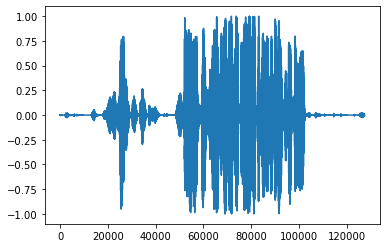

In [62]:
plt.plot(foo)

In [64]:
from play import play
play(foo)